## Data
### Breast Cancer Wisconsin (Diagnostic) Dataset
The data used in the project is UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.


## Objective
Our objective here is to predict whether the cancer is malignant(1) or benign(0), depending on the features of cancer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/DK/OneDrive/Desktop/udemy/TensorFlow_FILES/DATA/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df['Target'] = df['benign_0__mal_1']

In [7]:
df = df.drop('benign_0__mal_1', axis = 1)

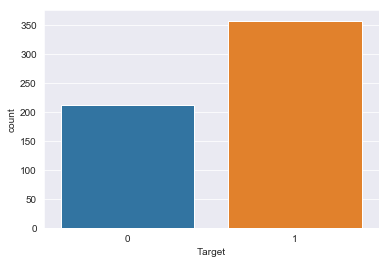

In [8]:
sns.set_style('darkgrid')
sns.countplot(df['Target'])

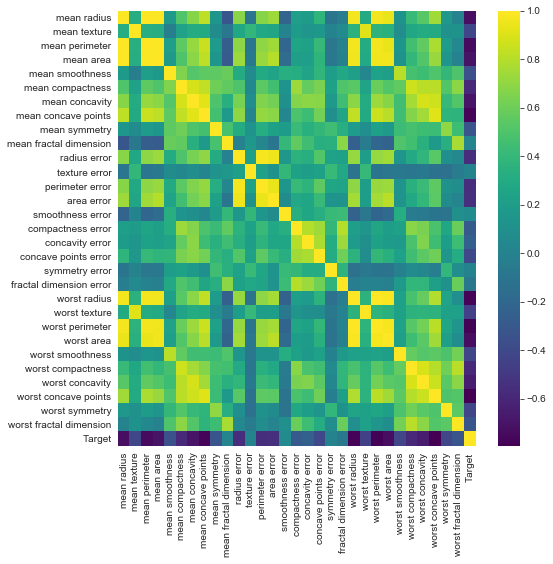

In [9]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap = 'viridis')

In [10]:
df.corr()['Target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

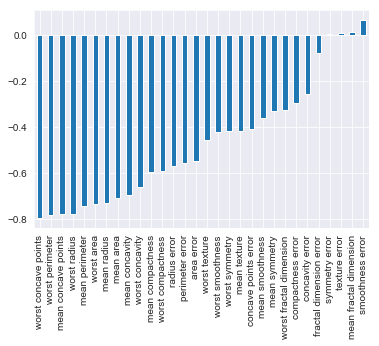

In [11]:
df.corr()['Target'][:-1].sort_values().plot(kind = 'bar')

### Train and Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Target', axis=1)
y = df['Target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [29]:
model_1 = Sequential()

model_1.add(Dense(30, activation='relu'))

model_1.add(Dense(15, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss= 'binary_crossentropy', optimizer = 'adam')

In [30]:
model_1.fit(x= X_train, y = y_train.values,
          validation_data = (X_test, y_test.values), epochs = 600,
          batch_size = 64)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/step - loss: 0.6871 - val_loss: 0.6679
Epoch 2/600
426/426 [==============================] - 0s 120us/step - loss: 0.6631 - val_loss: 0.6435
Epoch 3/600
426/426 [==============================] - 0s 108us/step - loss: 0.6408 - val_loss: 0.6207
Epoch 4/600
426/426 [==============================] - 0s 112us/step - loss: 0.6194 - val_loss: 0.5968
Epoch 5/600
426/426 [==============================] - 0s 127us/step - loss: 0.5962 - val_loss: 0.5707
Epoch 6/600
426/426 [==============================] - 0s 108us/step - loss: 0.5709 - val_loss: 0.5422
Epoch 7/600
426/426 [==============================] - 0s 112us/step - loss: 0.5450 - val_loss: 0.5124
Epoch 8/600
426/426 [==============================] - 0s 108us/step - loss: 0.5164 - val_loss: 0.4812
Epoch 9/600
426/426 [==============================] - 0s 106us/step - loss: 0.4872 - val_loss: 0.4494
Epoch 10/600
426/426 [=======

426/426 [==============================] - 0s 101us/step - loss: 0.0710 - val_loss: 0.0630
Epoch 80/600
426/426 [==============================] - 0s 113us/step - loss: 0.0710 - val_loss: 0.0648
Epoch 81/600
426/426 [==============================] - 0s 105us/step - loss: 0.0691 - val_loss: 0.0612
Epoch 82/600
426/426 [==============================] - 0s 110us/step - loss: 0.0691 - val_loss: 0.0606
Epoch 83/600
426/426 [==============================] - 0s 98us/step - loss: 0.0688 - val_loss: 0.0636
Epoch 84/600
426/426 [==============================] - 0s 98us/step - loss: 0.0671 - val_loss: 0.0606
Epoch 85/600
426/426 [==============================] - 0s 98us/step - loss: 0.0668 - val_loss: 0.0596
Epoch 86/600
426/426 [==============================] - 0s 103us/step - loss: 0.0669 - val_loss: 0.0626
Epoch 87/600
426/426 [==============================] - 0s 98us/step - loss: 0.0680 - val_loss: 0.0587
Epoch 88/600
426/426 [==============================] - 0s 103us/step - loss: 0.0

426/426 [==============================] - 0s 103us/step - loss: 0.0442 - val_loss: 0.0533
Epoch 158/600
426/426 [==============================] - 0s 91us/step - loss: 0.0439 - val_loss: 0.0512
Epoch 159/600
426/426 [==============================] - 0s 101us/step - loss: 0.0448 - val_loss: 0.0504
Epoch 160/600
426/426 [==============================] - 0s 103us/step - loss: 0.0429 - val_loss: 0.0544
Epoch 161/600
426/426 [==============================] - 0s 105us/step - loss: 0.0428 - val_loss: 0.0542
Epoch 162/600
426/426 [==============================] - 0s 120us/step - loss: 0.0426 - val_loss: 0.0512
Epoch 163/600
426/426 [==============================] - 0s 105us/step - loss: 0.0431 - val_loss: 0.0515
Epoch 164/600
426/426 [==============================] - 0s 112us/step - loss: 0.0418 - val_loss: 0.0563
Epoch 165/600
426/426 [==============================] - 0s 101us/step - loss: 0.0449 - val_loss: 0.0540
Epoch 166/600
426/426 [==============================] - 0s 112us/step

426/426 [==============================] - 0s 103us/step - loss: 0.0328 - val_loss: 0.0579
Epoch 236/600
426/426 [==============================] - 0s 98us/step - loss: 0.0320 - val_loss: 0.0581
Epoch 237/600
426/426 [==============================] - 0s 105us/step - loss: 0.0318 - val_loss: 0.0575
Epoch 238/600
426/426 [==============================] - 0s 103us/step - loss: 0.0318 - val_loss: 0.0595
Epoch 239/600
426/426 [==============================] - 0s 103us/step - loss: 0.0315 - val_loss: 0.0577
Epoch 240/600
426/426 [==============================] - 0s 101us/step - loss: 0.0315 - val_loss: 0.0580
Epoch 241/600
426/426 [==============================] - 0s 96us/step - loss: 0.0312 - val_loss: 0.0618
Epoch 242/600
426/426 [==============================] - 0s 98us/step - loss: 0.0312 - val_loss: 0.0575
Epoch 243/600
426/426 [==============================] - 0s 105us/step - loss: 0.0310 - val_loss: 0.0590
Epoch 244/600
426/426 [==============================] - 0s 102us/step -

426/426 [==============================] - 0s 120us/step - loss: 0.0247 - val_loss: 0.0688
Epoch 314/600
426/426 [==============================] - 0s 145us/step - loss: 0.0245 - val_loss: 0.0801
Epoch 315/600
426/426 [==============================] - 0s 124us/step - loss: 0.0236 - val_loss: 0.0701
Epoch 316/600
426/426 [==============================] - 0s 143us/step - loss: 0.0228 - val_loss: 0.0746
Epoch 317/600
426/426 [==============================] - 0s 110us/step - loss: 0.0229 - val_loss: 0.0779
Epoch 318/600
426/426 [==============================] - 0s 138us/step - loss: 0.0220 - val_loss: 0.0705
Epoch 319/600
426/426 [==============================] - 0s 124us/step - loss: 0.0234 - val_loss: 0.0738
Epoch 320/600
426/426 [==============================] - 0s 117us/step - loss: 0.0215 - val_loss: 0.0844
Epoch 321/600
426/426 [==============================] - 0s 122us/step - loss: 0.0224 - val_loss: 0.0727
Epoch 322/600
426/426 [==============================] - 0s 117us/ste

Epoch 391/600
426/426 [==============================] - 0s 103us/step - loss: 0.0186 - val_loss: 0.1151
Epoch 392/600
426/426 [==============================] - 0s 98us/step - loss: 0.0164 - val_loss: 0.0901
Epoch 393/600
426/426 [==============================] - 0s 105us/step - loss: 0.0179 - val_loss: 0.0964
Epoch 394/600
426/426 [==============================] - 0s 108us/step - loss: 0.0165 - val_loss: 0.1066
Epoch 395/600
426/426 [==============================] - 0s 96us/step - loss: 0.0158 - val_loss: 0.0989
Epoch 396/600
426/426 [==============================] - 0s 112us/step - loss: 0.0168 - val_loss: 0.0960
Epoch 397/600
426/426 [==============================] - 0s 98us/step - loss: 0.0158 - val_loss: 0.1142
Epoch 398/600
426/426 [==============================] - 0s 105us/step - loss: 0.0176 - val_loss: 0.0965
Epoch 399/600
426/426 [==============================] - 0s 103us/step - loss: 0.0150 - val_loss: 0.1151
Epoch 400/600
426/426 [==============================] - 0

426/426 [==============================] - 0s 103us/step - loss: 0.0125 - val_loss: 0.1285
Epoch 470/600
426/426 [==============================] - 0s 101us/step - loss: 0.0113 - val_loss: 0.1210
Epoch 471/600
426/426 [==============================] - 0s 103us/step - loss: 0.0132 - val_loss: 0.1283
Epoch 472/600
426/426 [==============================] - 0s 110us/step - loss: 0.0136 - val_loss: 0.1169
Epoch 473/600
426/426 [==============================] - 0s 138us/step - loss: 0.0138 - val_loss: 0.1532
Epoch 474/600
426/426 [==============================] - 0s 131us/step - loss: 0.0114 - val_loss: 0.1169
Epoch 475/600
426/426 [==============================] - 0s 131us/step - loss: 0.0123 - val_loss: 0.1200
Epoch 476/600
426/426 [==============================] - 0s 131us/step - loss: 0.0115 - val_loss: 0.1462
Epoch 477/600
426/426 [==============================] - 0s 150us/step - loss: 0.0113 - val_loss: 0.1278
Epoch 478/600
426/426 [==============================] - 0s 152us/ste

426/426 [==============================] - 0s 105us/step - loss: 0.0084 - val_loss: 0.1518
Epoch 548/600
426/426 [==============================] - 0s 101us/step - loss: 0.0082 - val_loss: 0.1566
Epoch 549/600
426/426 [==============================] - 0s 108us/step - loss: 0.0086 - val_loss: 0.1602
Epoch 550/600
426/426 [==============================] - 0s 113us/step - loss: 0.0087 - val_loss: 0.1498
Epoch 551/600
426/426 [==============================] - 0s 110us/step - loss: 0.0080 - val_loss: 0.1641
Epoch 552/600
426/426 [==============================] - 0s 108us/step - loss: 0.0081 - val_loss: 0.1550
Epoch 553/600
426/426 [==============================] - 0s 108us/step - loss: 0.0079 - val_loss: 0.1494
Epoch 554/600
426/426 [==============================] - 0s 98us/step - loss: 0.0078 - val_loss: 0.1585
Epoch 555/600
426/426 [==============================] - 0s 112us/step - loss: 0.0079 - val_loss: 0.1541
Epoch 556/600
426/426 [==============================] - 0s 110us/step

In [35]:
losses = pd.DataFrame(model_1.history.history)

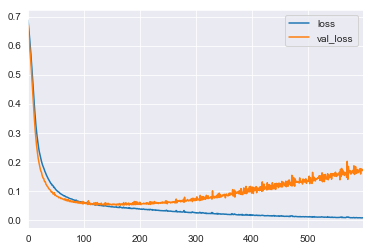

In [36]:
losses.plot()

In [37]:
preds = model_1.predict_classes(X_test)

In [38]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.99      0.93      0.96        89

   micro avg       0.95      0.95      0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [39]:
print(confusion_matrix(y_test,preds))

[[53  1]
 [ 6 83]]


In [44]:
accuracy_score(y_test, preds) * 100

95.1048951048951

#### It can be observed clearly that we have overfitted the data, let's try to decrease the validation error.

### Early Stopping 

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [20]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam')

In [23]:
model.fit(x=X_train, y= y_train.values,
          validation_data = (X_test, y_test.values), 
          epochs = 600, batch_size = 64, 
          callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/step - loss: 0.6764 - val_loss: 0.6598
Epoch 2/600
426/426 [==============================] - 0s 128us/step - loss: 0.6548 - val_loss: 0.6386
Epoch 3/600
426/426 [==============================] - 0s 122us/step - loss: 0.6382 - val_loss: 0.6207
Epoch 4/600
426/426 [==============================] - 0s 122us/step - loss: 0.6206 - val_loss: 0.6009
Epoch 5/600
426/426 [==============================] - 0s 131us/step - loss: 0.6023 - val_loss: 0.5790
Epoch 6/600
426/426 [==============================] - 0s 127us/step - loss: 0.5817 - val_loss: 0.5540
Epoch 7/600
426/426 [==============================] - 0s 124us/step - loss: 0.5574 - val_loss: 0.5223
Epoch 8/600
426/426 [==============================] - 0s 115us/step - loss: 0.5286 - val_loss: 0.4901
Epoch 9/600
426/426 [==============================] - 0s 108us/step - loss: 0.5005 - val_loss: 0.4584
Epoch 10/600
426/426 [=======

426/426 [==============================] - 0s 103us/step - loss: 0.0692 - val_loss: 0.0559
Epoch 80/600
426/426 [==============================] - 0s 103us/step - loss: 0.0691 - val_loss: 0.0578
Epoch 81/600
426/426 [==============================] - 0s 98us/step - loss: 0.0686 - val_loss: 0.0562
Epoch 82/600
426/426 [==============================] - 0s 115us/step - loss: 0.0674 - val_loss: 0.0577
Epoch 83/600
426/426 [==============================] - 0s 101us/step - loss: 0.0668 - val_loss: 0.0553
Epoch 84/600
426/426 [==============================] - 0s 112us/step - loss: 0.0660 - val_loss: 0.0559
Epoch 85/600
426/426 [==============================] - 0s 108us/step - loss: 0.0656 - val_loss: 0.0572
Epoch 86/600
426/426 [==============================] - 0s 107us/step - loss: 0.0660 - val_loss: 0.0550
Epoch 87/600
426/426 [==============================] - 0s 108us/step - loss: 0.0644 - val_loss: 0.0568
Epoch 88/600
426/426 [==============================] - 0s 101us/step - loss: 

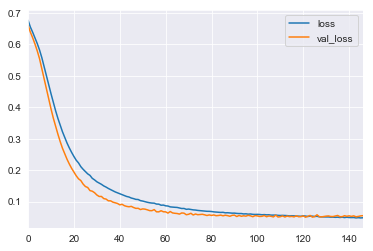

In [34]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [25]:
predictions = model.predict_classes(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

   micro avg       0.99      0.99      0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [28]:
print(confusion_matrix(y_test,predictions))

[[53  1]
 [ 1 88]]


In [40]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, predictions) * 100

98.6013986013986